In [1]:
%run import_util.py
import scan_api
import util

START loading util functions
DONE loading util functions


In [2]:
# set the data folder to work on
util.data_directory="./data/"
print(util.data_directory)
n=2
n1=10

./data/


In [3]:
from datetime import date, timedelta
dataLatestdate = date.today()- timedelta(1)

# m/dd/yy
dateStr=dataLatestdate.strftime("%#m/%d/%y")
print("dateStr =", dateStr)

dateStr = 4/29/20


# read covid_data

In [4]:
df0=util.read_file("generated_data/covid_timeseries_deaths.csv")
df1=util.read_file("generated_data/covid_timeseries_cases.csv")
df2=util.read_file("generated_data/covid_timeseries_recovered.csv")
dfList=[df0,df1,df2]
# df0[df0['country']=='India']

# EDA Start - plot day0 data

In [5]:
dfList_Countries1=[]
# tier1_countryList=['Italy','US','Spain','Turkey']
# countryList=['Germany','India','S. Korea','UK', 'Brazil','Indonesia','Canada','France',]
countryList=util.countryList
for i, df in enumerate(dfList):
    df1=df[df['country'].isin(countryList)]
    df1.drop({'lat','long'},axis=1,inplace=True)
    df1.sort_values('country')
    df1=df1.rename(util.new_countries)
    dfList_Countries1.append(df1)


cutoff=[3000,40000,22000]
dfList_Countries=[]
for i, df in enumerate(dfList_Countries1):
#     cutoff=df[dateStr].mean()
#     high_death_rate_countries=df[df[dateStr]>=cutoff]
#     low_death_rate_countries=df[df[dateStr]<cutoff]
    high_death_rate_countries=df[df[dateStr]>=cutoff[i]]
    low_death_rate_countries=df[df[dateStr]<cutoff[i]]
    dfList_Countries.append(high_death_rate_countries)
    dfList_Countries.append(low_death_rate_countries)
    
    
for i, df in enumerate(dfList_Countries):
    df2=df.rename(columns={"country":"day"})
    df2=df2.set_index('day').transpose()
    df2=df2.reset_index().rename(columns={"index":"date"})
    df2['date']= pd.to_datetime(df2['date'])
    countryListFilter=df2.columns.drop('date')
    df2[countryListFilter] = df2[countryListFilter].apply(pd.to_numeric)
    dfList_Countries[i]=df2

for df in dfList_Countries:
    display(df.head(n))

day,date,Belgium,Brazil,Canada,China,France,Germany,Iran,Italy,Netherlands,Spain,Turkey,USA,UK
0,2020-01-22,0,0,0,17,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,18,0,0,0,0,0,0,0,0,0


day,date,Australia,India,Indonesia,Ireland,Israel,S. Korea,Norway,Portugal,Russia,Sweden,Switzerland
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0


day,date,Belgium,Brazil,Canada,China,France,Germany,Iran,Italy,Russia,Spain,Turkey,USA,UK
0,2020-01-22,0,0,0,548,0,0,0,0,0,0,0,1,0
1,2020-01-23,0,0,0,643,0,0,0,0,0,0,0,1,0


day,date,Australia,India,Indonesia,Ireland,Israel,S. Korea,Netherlands,Norway,Portugal,Sweden,Switzerland
0,2020-01-22,0,0,0,0,0,1,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,1,0,0,0,0,0


day,date,Brazil,China,France,Germany,Iran,Italy,Spain,Switzerland,Turkey,USA
0,2020-01-22,0,28,0,0,0,0,0,0,0,0
1,2020-01-23,0,30,0,0,0,0,0,0,0,0


day,date,Australia,Belgium,Canada,India,Indonesia,Ireland,Israel,S. Korea,Netherlands,Norway,Portugal,Russia,Sweden,UK
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0


{'Belgium': Timestamp('2020-03-11 00:00:00'),
 'Brazil': Timestamp('2020-03-18 00:00:00'),
 'Canada': Timestamp('2020-03-16 00:00:00'),
 'China': Timestamp('2020-01-22 00:00:00'),
 'France': Timestamp('2020-02-26 00:00:00'),
 'Germany': Timestamp('2020-03-09 00:00:00'),
 'Iran': Timestamp('2020-02-19 00:00:00'),
 'Italy': Timestamp('2020-02-22 00:00:00'),
 'Netherlands': Timestamp('2020-03-08 00:00:00'),
 'Spain': Timestamp('2020-03-04 00:00:00'),
 'Turkey': Timestamp('2020-03-19 00:00:00'),
 'USA': Timestamp('2020-03-02 00:00:00'),
 'UK': Timestamp('2020-03-07 00:00:00')}

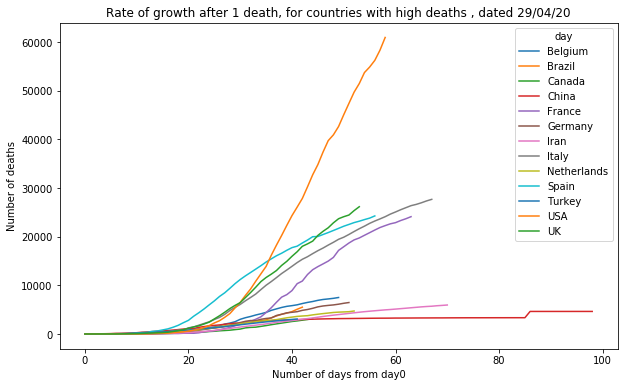

{'Australia': Timestamp('2020-03-04 00:00:00'),
 'India': Timestamp('2020-03-13 00:00:00'),
 'Indonesia': Timestamp('2020-03-13 00:00:00'),
 'Ireland': Timestamp('2020-03-14 00:00:00'),
 'Israel': Timestamp('2020-03-24 00:00:00'),
 'S. Korea': Timestamp('2020-02-21 00:00:00'),
 'Norway': Timestamp('2020-03-14 00:00:00'),
 'Portugal': Timestamp('2020-03-18 00:00:00'),
 'Russia': Timestamp('2020-03-25 00:00:00'),
 'Sweden': Timestamp('2020-03-14 00:00:00'),
 'Switzerland': Timestamp('2020-03-08 00:00:00')}

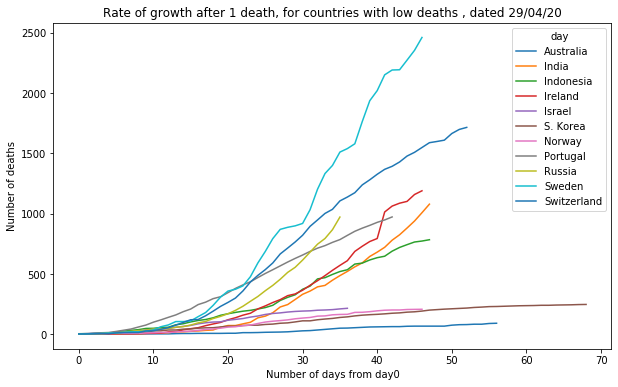

In [9]:
def dayZeroData(df,country,mydict,dayzero):
    df4 = df[['date',country]]
    df4 = df4.set_index('date')
    df4=df4[df4[country]>dayzero]
    df4.reset_index(inplace=True)
    mydict.update( {country : df4.head(1).date[0]} )
    df4.drop({'date'},axis=1,inplace=True)
    return df4

def pltDataDay0(df, dayzero=1,
                graphTitle="cases",
                xlabel="Number of days from day0",
                ylabel="cases"):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Rate of growth after " + str(dayzero) + " "+ graphTitle + " , dated " + dataLatestdate.strftime("%d/%m/%y")) 
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Number of " + ylabel)
    mydict = {}
    
    countryL=df.columns.drop('date')
    for cols in countryL:
        x=dayZeroData(df,cols,mydict,dayzero)
        x.plot(ax=ax)

    display(mydict)
    plt.show()
#     return mydict


pltDataDay0(dfList_Countries[0],dayzero=1,graphTitle="death, for countries with high deaths",ylabel="deaths")
pltDataDay0(dfList_Countries[1],dayzero=1,graphTitle="death, for countries with low deaths",ylabel="deaths")



{'Belgium': Timestamp('2020-03-07 00:00:00'),
 'Brazil': Timestamp('2020-03-13 00:00:00'),
 'Canada': Timestamp('2020-03-13 00:00:00'),
 'China': Timestamp('2020-01-22 00:00:00'),
 'France': Timestamp('2020-03-02 00:00:00'),
 'Germany': Timestamp('2020-03-02 00:00:00'),
 'Iran': Timestamp('2020-02-27 00:00:00'),
 'Italy': Timestamp('2020-02-23 00:00:00'),
 'Russia': Timestamp('2020-03-19 00:00:00'),
 'Spain': Timestamp('2020-03-03 00:00:00'),
 'Turkey': Timestamp('2020-03-19 00:00:00'),
 'USA': Timestamp('2020-03-05 00:00:00'),
 'UK': Timestamp('2020-03-06 00:00:00')}

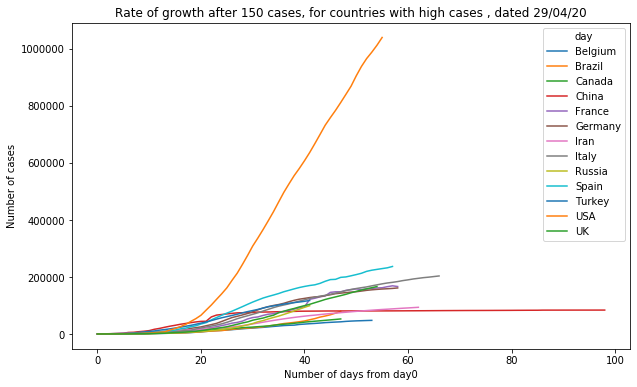

{'Australia': Timestamp('2020-03-13 00:00:00'),
 'India': Timestamp('2020-03-18 00:00:00'),
 'Indonesia': Timestamp('2020-03-17 00:00:00'),
 'Ireland': Timestamp('2020-03-16 00:00:00'),
 'Israel': Timestamp('2020-03-14 00:00:00'),
 'S. Korea': Timestamp('2020-02-21 00:00:00'),
 'Netherlands': Timestamp('2020-03-07 00:00:00'),
 'Norway': Timestamp('2020-03-08 00:00:00'),
 'Portugal': Timestamp('2020-03-14 00:00:00'),
 'Sweden': Timestamp('2020-03-07 00:00:00'),
 'Switzerland': Timestamp('2020-03-06 00:00:00')}

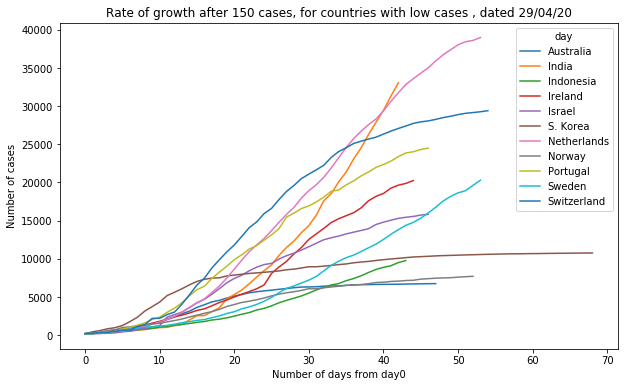

In [10]:
pltDataDay0(dfList_Countries[2],graphTitle="cases, for countries with high cases", dayzero=150)
pltDataDay0(dfList_Countries[3],graphTitle="cases, for countries with low cases",dayzero=150)


{'Brazil': Timestamp('2020-03-17 00:00:00'),
 'China': Timestamp('2020-01-22 00:00:00'),
 'France': Timestamp('2020-02-12 00:00:00'),
 'Germany': Timestamp('2020-02-18 00:00:00'),
 'Iran': Timestamp('2020-02-26 00:00:00'),
 'Italy': Timestamp('2020-02-23 00:00:00'),
 'Spain': Timestamp('2020-02-15 00:00:00'),
 'Switzerland': Timestamp('2020-03-03 00:00:00'),
 'Turkey': Timestamp('2020-03-25 00:00:00'),
 'USA': Timestamp('2020-02-09 00:00:00')}

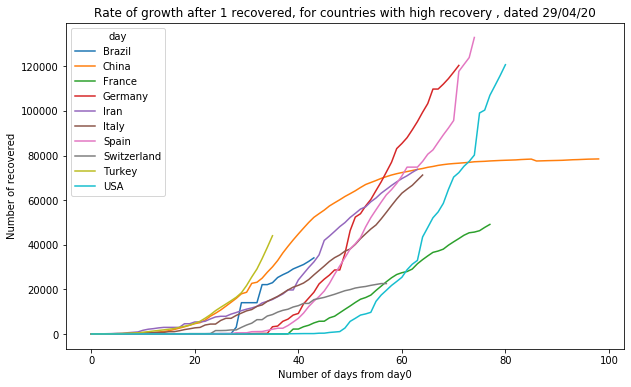

{'Australia': Timestamp('2020-01-30 00:00:00'),
 'Belgium': Timestamp('2020-03-18 00:00:00'),
 'Canada': Timestamp('2020-02-21 00:00:00'),
 'India': Timestamp('2020-02-16 00:00:00'),
 'Indonesia': Timestamp('2020-03-10 00:00:00'),
 'Ireland': Timestamp('2020-03-17 00:00:00'),
 'Israel': Timestamp('2020-03-06 00:00:00'),
 'S. Korea': Timestamp('2020-02-09 00:00:00'),
 'Netherlands': Timestamp('2020-03-14 00:00:00'),
 'Norway': Timestamp('2020-03-24 00:00:00'),
 'Portugal': Timestamp('2020-03-14 00:00:00'),
 'Russia': Timestamp('2020-02-12 00:00:00'),
 'Sweden': Timestamp('2020-03-19 00:00:00'),
 'UK': Timestamp('2020-02-16 00:00:00')}

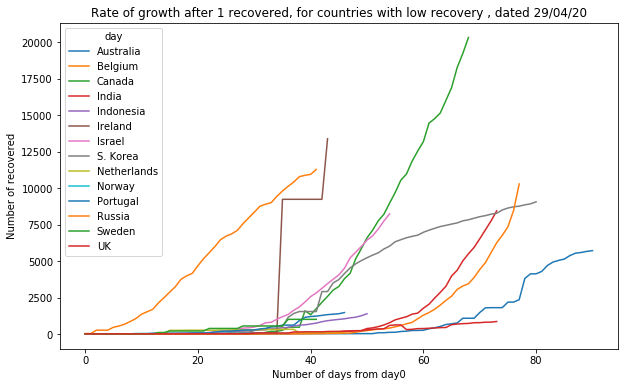

In [11]:
pltDataDay0(dfList_Countries[4],graphTitle="recovered, for countries with high recovery",ylabel="recovered")
pltDataDay0(dfList_Countries[5],graphTitle="recovered, for countries with low recovery",ylabel="recovered")